In [2]:
# Dependencies

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.metrics import classification_report_imbalanced
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Import file
seattle_df = pd.read_csv('data/cleaned_seattle_data.csv')
seattle_df.head(10)

,ADDRTYPE,COLLISIONTYPE,FATALITIES,INATTENTIONIND,INCDATE,INJURIES,LIGHTCOND,PEDCOUNT,PEDCYLCOUNT,PERSONCOUNT,ROADCOND,SDOT_COLCODE,SERIOUSINJURIES,SEVERITYCODE,SEVERITYDESC,SPEEDING,ST_COLCODE,UNDERINFL,VEHCOUNT,WEATHER
0,2.0,9.0,0,0,2020/10/15 00:00:00+00,0,1.0,0,0,2,0.0,11.0,0,1,0,0,16,0,2,3.0
1,1.0,8.0,0,0,2022/08/17 00:00:00+00,0,1.0,0,0,2,0.0,14.0,0,1,0,0,14,0,2,1.0
2,1.0,8.0,0,0,2005/06/07 00:00:00+00,0,1.0,0,0,6,0.0,14.0,0,1,0,0,14,0,3,3.0
3,2.0,8.0,0,0,2020/10/04 00:00:00+00,0,2.0,0,0,3,0.0,14.0,0,1,0,0,14,0,2,1.0
4,1.0,4.0,0,0,2006/09/12 00:00:00+00,0,1.0,0,0,3,0.0,16.0,0,1,0,0,15,0,2,1.0
5,2.0,4.0,0,0,2013/03/25 00:00:00+00,0,1.0,0,0,2,0.0,11.0,0,1,0,0,28,0,2,1.0
6,1.0,6.0,0,0,2013/03/30 00:00:00+00,0,3.0,0,0,2,0.0,14.0,0,1,0,0,32,0,2,0.0
7,1.0,6.0,0,1,2007/10/07 00:00:00+00,0,1.0,0,0,2,1.0,11.0,0,1,0,0,20,0,2,4.0
8,2.0,1.0,0,0,2022/07/14 00:00:00+00,0,1.0,0,0,4,0.0,11.0,0,1,0,0,10,0,2,1.0
9,1.0,4.0,0,0,2013/04/02 00:00:00+00,0,1.0,0,0,2,0.0,11.0,0,1,0,0,28,0,2,3.0


In [4]:
# Features included
selected_columns = ['FATALITIES', 'LIGHTCOND', 'ROADCOND', 'WEATHER',
                     'SPEEDING', 'COLLISIONTYPE', 'SERIOUSINJURIES', 'UNDERINFL', 'ADDRTYPE', 'PERSONCOUNT', 'INATTENTIONIND']
ml_seattle_df = seattle_df[selected_columns]
ml_seattle_df.dropna(inplace=True)
ml_seattle_df['INJURY'] = (ml_seattle_df['FATALITIES'] > 0) | (ml_seattle_df['SERIOUSINJURIES'] > 0)

# Count of data included
len(ml_seattle_df)

206175

In [5]:
ml_seattle_df.head()

,FATALITIES,LIGHTCOND,ROADCOND,WEATHER,SPEEDING,COLLISIONTYPE,SERIOUSINJURIES,UNDERINFL,ADDRTYPE,PERSONCOUNT,INATTENTIONIND,INJURY
0,0,1.0,0.0,3.0,0,9.0,0,0,2.0,2,0,False
1,0,1.0,0.0,1.0,0,8.0,0,0,1.0,2,0,False
2,0,1.0,0.0,3.0,0,8.0,0,0,1.0,6,0,False
3,0,2.0,0.0,1.0,0,8.0,0,0,2.0,3,0,False
4,0,1.0,0.0,1.0,0,4.0,0,0,1.0,3,0,False


In [6]:
ml_seattle_df.dtypes

FATALITIES           int64
LIGHTCOND          float64
ROADCOND           float64
WEATHER            float64
SPEEDING             int64
COLLISIONTYPE      float64
SERIOUSINJURIES      int64
UNDERINFL            int64
ADDRTYPE           float64
PERSONCOUNT          int64
INATTENTIONIND       int64
INJURY                bool
dtype: object

In [7]:
# Features that are included while training the models
X = ml_seattle_df[['LIGHTCOND', 'ROADCOND', 'WEATHER', 'SPEEDING', 
                   'COLLISIONTYPE', 'ADDRTYPE', 'UNDERINFL']]

# Target Variable
y = ml_seattle_df['INJURY']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [8]:
# Logistic Regression Model

model = LogisticRegression()

# Train the model using the training data
model.fit(X_train, y_train)

# Predict on the testing data
y_pred = model.predict(X_test)

# Evaluate the performance of the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

average = 'macro'

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average=average)
recall = recall_score(y_test, y_pred, average=average)
f1 = f1_score(y_test, y_pred, average=average)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.9809870255850612
Precision: 0.4904935127925306
Recall: 0.5
F1-score: 0.49520113605758637


In [9]:
# Random Forest Classifier Model

model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predict on the testing data
y_pred = model.predict(X_test)

# Evaluate the performance of the model
average = 'macro'
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average=average)
recall = recall_score(y_test, y_pred, average=average)
f1 = f1_score(y_test, y_pred, average=average)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.9807930156420517
Precision: 0.5738483370933702
Recall: 0.5011519038655486
F1-score: 0.49766401860171394


In [10]:
# Due to the class imbalance in the data I used SMOTE to 
# oversample the under represented class

from imblearn.over_sampling import SMOTE
smote = SMOTE()

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [11]:
model = LogisticRegression()

# Train the model using the training data
model.fit(X_train_resampled, y_train_resampled)

# Predict on the testing data
y_pred = model.predict(X_test)

# Evaluate the performance of the model
average = 'macro'
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average=average)
recall = recall_score(y_test, y_pred, average=average)
f1 = f1_score(y_test, y_pred, average=average)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.6135806960106706
Precision: 0.5082642549250184
Recall: 0.6054210082342002
F1-score: 0.40629338232104906


In [12]:
model = RandomForestClassifier()
model.fit(X_train_resampled, y_train_resampled)

# Predict on the testing data
y_pred = model.predict(X_test)

# Evaluate the performance of the model
average = 'macro'
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average=average)
recall = recall_score(y_test, y_pred, average=average)
f1 = f1_score(y_test, y_pred, average=average)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.8035891839456772
Precision: 0.5220550558701967
Recall: 0.6885078961747118
F1-score: 0.49449417662557926


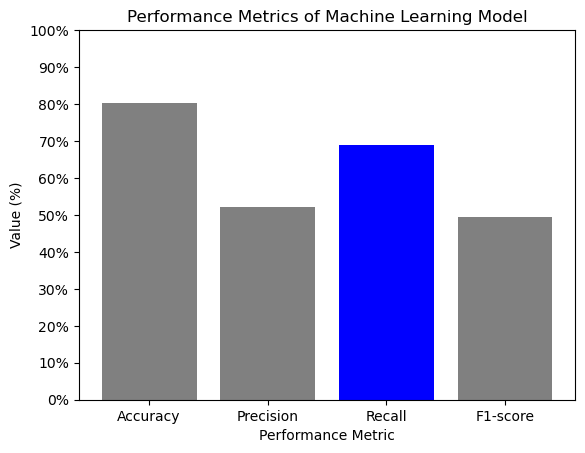

In [46]:
# Define the performance metrics
performance_metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
values = [accuracy, precision, recall, f1]

# Multiply the values by 100 to convert them to percentages
values_percentage = [value * 100 for value in values]

# Define colors for each bar
colors = ['grey', 'grey', 'blue', 'grey']

# Create a bar chart
plt.bar(performance_metrics, values_percentage, color=colors)
plt.xlabel('Performance Metric')
plt.ylabel('Value (%)')
plt.title('Performance Metrics of Machine Learning Model')

# Set y-tick labels as percentages
plt.ylim(0, 100)
plt.yticks(range(0, 101, 10), [f'{value}%' for value in range(0, 101, 10)])

plt.show()

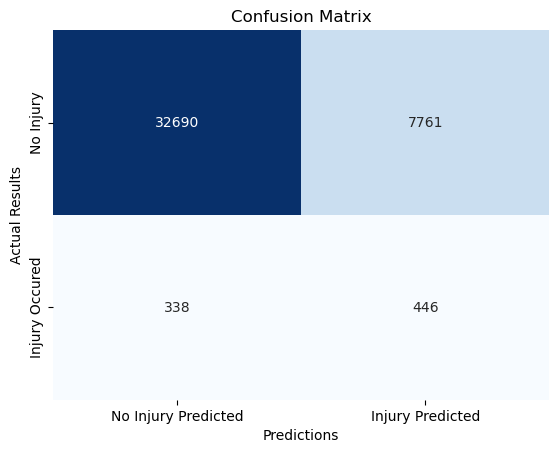

In [13]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

predicted_class_names=['No Injury Predicted', 'Injury Predicted']
acutual_class_names= ['No Injury', 'Injury Occured']

# Plot the confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predictions')
plt.ylabel('Actual Results')
plt.xticks(ticks=[0.5, 1.5], labels= predicted_class_names) 
plt.yticks(ticks=[0.5, 1.5], labels= acutual_class_names)
plt.title('Confusion Matrix')
plt.show()

In [14]:
feature_importances = model.feature_importances_
importances_df = pd.DataFrame({'feature': X_train.columns, 'importance': feature_importances})
importances_df = importances_df.sort_values(by='importance', ascending=False)
importances_df

,feature,importance
4,COLLISIONTYPE,0.627999
2,WEATHER,0.085720
5,ADDRTYPE,0.081506
1,ROADCOND,0.076386
0,LIGHTCOND,0.076222
3,SPEEDING,0.033987
6,UNDERINFL,0.018180


In [15]:
collisiontype_injury_percentage = ml_seattle_df.groupby('COLLISIONTYPE')['INJURY'].mean() * 100

collisiontype_injury_percentage = collisiontype_injury_percentage.sort_values(ascending=False)

collisiontype_injury_percentage


COLLISIONTYPE
7.0     13.851675
2.0      7.852515
3.0      6.095552
5.0      2.602202
4.0      2.162054
1.0      1.385331
9.0      0.813517
8.0      0.698688
10.0     0.475547
6.0      0.338042
Name: INJURY, dtype: float64

In [16]:
collisiontype_key = {'Angles': 1,
                     'Cycles': 2,
                     'Head On': 3,
                     'Left Turn': 4,
                     'Other': 5,
                     'Parked Car': 6,
                     'Pedestrian': 7,
                     'Rear Ended': 8,
                     'Right Turn': 9,
                     'Sideswipe': 10,
                    }

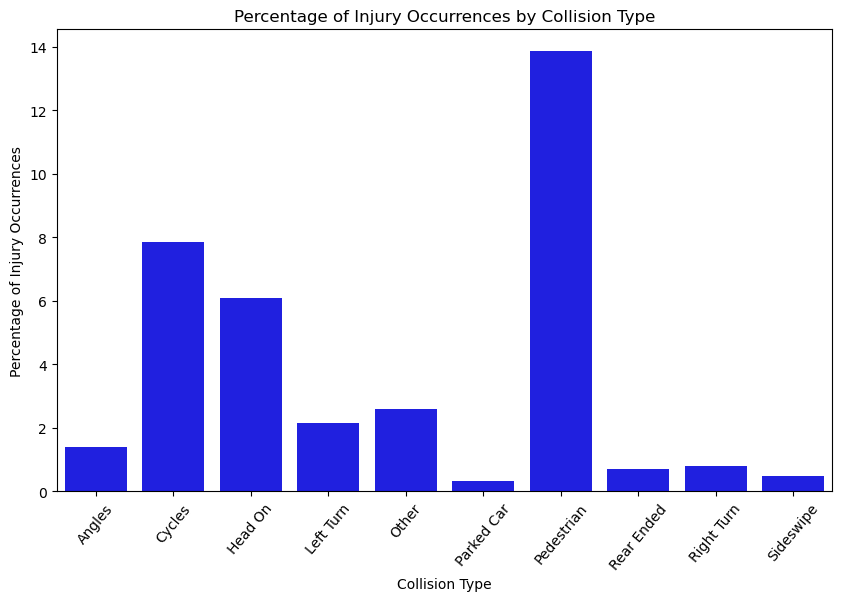

In [17]:
# Create a bar chart to visualize the results

plt.figure(figsize=(10, 6))
sns.barplot(x=collisiontype_injury_percentage.index, y=collisiontype_injury_percentage.values, color='blue')
plt.xlabel('Collision Type')
plt.ylabel('Percentage of Injury Occurrences')
plt.title('Percentage of Injury Occurrences by Collision Type')
plt.xticks(ticks=range(len(collisiontype_key)), labels=collisiontype_key.keys(), rotation=50)
plt.show()

In [18]:
lightcond_injury_percentage = ml_seattle_df.groupby('LIGHTCOND')['INJURY'].mean() * 100

lightcond_injury_percentage = lightcond_injury_percentage.sort_values(ascending=False)

lightcond_injury_percentage

# lightcond_key = {
#     'Daylight': 1,
#     'Dark - Street Lights On': 2,
#     'Unknown': 3,
#     'Dusk': 4,
#     'Dawn': 5,
#     'Dark - No Street Lights': 6,
#     'Other': 7,
#     'Dark - Street Lights Off': 8,
#     'Dark - Unknown Lighting': 9
# }

LIGHTCOND
9.0    6.250000
7.0    2.734375
5.0    2.635328
8.0    2.631579
2.0    2.561291
4.0    2.154705
6.0    1.838671
1.0    1.732076
3.0    0.202130
Name: INJURY, dtype: float64

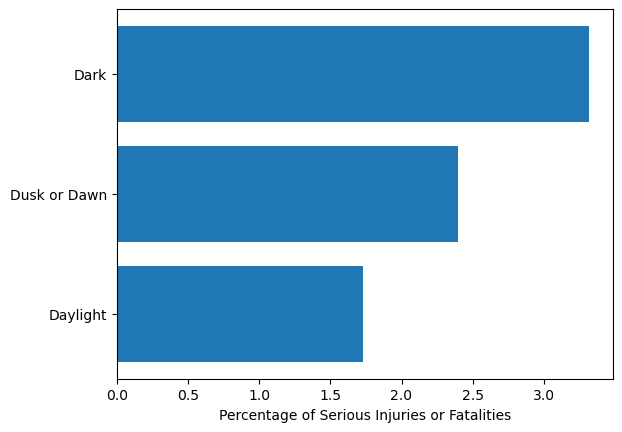

In [33]:
# Calculate injury percentages for each light condition
lightcond_injury_percentage = ml_seattle_df.groupby('LIGHTCOND')['INJURY'].mean() * 100

# Filter for Daylight, Dark, and Dusk or Dawn
injury_percentages = [lightcond_injury_percentage[1],
                      lightcond_injury_percentage[[4, 5]].mean(),
                      lightcond_injury_percentage[[2, 6, 8, 9]].mean()]

# Create a bar chart
light_conditions = ['Daylight', 'Dusk or Dawn', 'Dark']
plt.barh(light_conditions, injury_percentages)
plt.xlabel('Percentage of Serious Injuries or Fatalities')
plt.title('')
plt.show()